In [39]:
%pylab inline
import os, sys
sys.path.append("../")
import traml
import db
from scipy.optimize import minimize
import copy
import time

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [ ]:
PAZO = 500603
PMMA = 500201
sio2 = 111401
mgf2 = 105404
a = traml.stack()
a.library.search(sio2)

In [41]:
def fun(x, stack, layers, c, delta, TR):
    for i in layers:
        stack.d(i, x[i-1])

    for p in x:
        p = np.sqrt(x[0]**2)
    x[0]=np.sqrt(x[0]**2)
    #min = 1-stack.average(TR, c, delta, o='a')
    min = stack.average(TR, c, delta)
   
    return min**10

In [42]:
def minTR(stack, film_range, c, delta, TR='T'):
    
    x = []
    layers = []
    bnds = []
    for i in range(film_range[0],film_range[1]+1):
        x.append(stack.config[i][1])
        layers.append(i)
        bnds.append(stack.config[i][3])
        
    result = minimize(fun, x, args=(stack, layers, c,delta, TR), bounds = bnds,tol=1e-30, method='SLSQP')
    
    
    return result

In [105]:
c = traml.Stack()
c.set_range([0.4, 0.8])

peak = 0.65
delta = 0.01
stack_list = []
R=[]
n=[]

N = 40
timer=[]

for i in range(0, N):
    start = time.clock()
    #if i % 2 == 0:
       # print 'even', i
        #c.add(PMMA,100, bnds=(50,250))
    # else:
        #c.add(PAZO,100, bnds=(50,250))
    
    c.add(PMMA, 100, bnds=(0,250))
    c.add(PAZO, 100, bnds=(0,250))
    
    
    result = minTR(c, [1,len(c.config)-1], peak, delta, TR='T')
    R.append(c.average('R',peak,delta))
    n.append(i+1)
    
    stack_list.append(copy.deepcopy(c))
  
    print '============================================================================================'
   
    print i+1, ': ', 'R = ', c.average('R',peak,delta)
    end = time.clock()
    duration = end-start
    timer.append(duration)
 
    

1 :  R =  0.122300549851
2 :  R =  0.18689975376
3 :  R =  0.262783741465
4 :  R =  0.344458421125
5 :  R =  0.427038924894
6 :  R =  0.506669029973
7 :  R =  0.58065534966
8 :  R =  0.647396984267
9 :  R =  0.706120740773
10 :  R =  0.75692829879
11 :  R =  0.800105907027
12 :  R =  0.836497023092
13 :  R =  0.866700320879
14 :  R =  0.891762659117
15 :  R =  0.912353970934
16 :  R =  0.928986626022
17 :  R =  0.9422491017
18 :  R =  0.952780427833
19 :  R =  0.961152578563
20 :  R =  0.967834472776
21 :  R =  0.973195584856
22 :  R =  0.97752201017
23 :  R =  0.981033982224
24 :  R =  0.983901096635
25 :  R =  0.986254445872
26 :  R =  0.988195921447
27 :  R =  0.989805220739
28 :  R =  0.991145091391
29 :  R =  0.992265256134
30 :  R =  0.993205360348
31 :  R =  0.993997197989
32 :  R =  0.994666403761
33 :  R =  0.995233748754
34 :  R =  0.995716139675
35 :  R =  0.996127394975
36 :  R =  0.996478851781
37 :  R =  0.996779843564
38 :  R =  0.997038078284
39 :  R =  0.997259939393
4

In [121]:
s = []
for item in timer:
    s.append(2*pi*(item)**2)

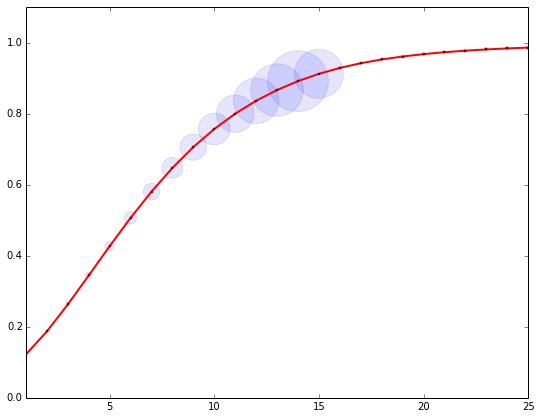

In [124]:
fig = figure(figsize=(9,7))
ax = fig.add_subplot(111)
R = []

for stack in stack_list:
    R.append(stack.average('R',0.65,0.01))
    
ax.scatter(n, R, s=s, alpha = 0.1)
ax.set_xlim([1,25])
ax.set_ylim([0,1.1])
ax.plot(n, R, 'o-', linewidth=2, color='red', markersize = 2)




In [ ]:
len(n)

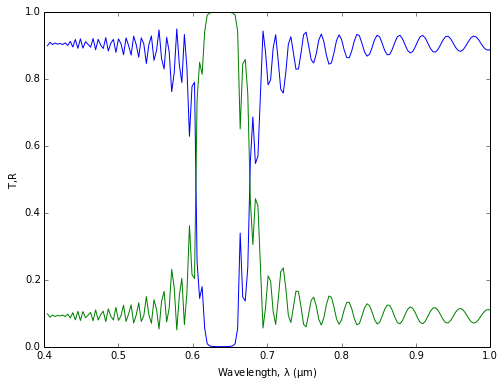

In [118]:
c.set_range([0.4, 1.0])
c.plot()